In [1]:
# basic
import sys
import os

# common
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#lib
from lib.validation_methodology_plots import *


ModuleNotFoundError: No module named 'lib.validation_methodology_plots'

In [2]:
path_p = r'/home/administrador/Documentos/seasonal/seasonal_forecast/new/'

In [3]:
df_2021 = pd.read_pickle(path_p+'df_coordinates_pmin_sst_mld_2021.pkl')
xs = xr.open_dataset(path_p+'xs_index_vars_19822019_2deg_new.nc')
xds_kma = xr.open_dataset(path_p+'kma_model/xds_kma_index_vars_1b.nc')
xs_dwt_counts = xr.open_dataset(path_p+'kma_model/xds_count_tcs8.nc')
xs_dwt_counts_964 = xr.open_dataset(path_p+'kma_model/xds_count_tcs8_964.nc')
xds_timeM = xr.open_dataset(path_p+'xds_timeM8.nc')
xds_PCA = xr.open_dataset(path_p+'xds_PCA.nc')
xds_kma_ord = xr.open_dataset(path_p+'xds_kma_ord.nc')

<br>
<br>
<br>

#  <font color='navy'>**6. Model Validation** </font> 

>6.1 [Index predictor](#p)<br> <br>
>6.2 [Predictand computation and plotting](#plv)<br> <br><br> <br>













<br>
<br>

**After analizing the tailor-made predictor along the hindcast data for the calibration period (1982-2019), the performace of the model will be validated for year 2020, which has not been included in the predictor calibration process.**

<br> 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">
    
**Steps:**
<br>  
    
 * **1.** Download and preprocess (file conversion and resolution interpolation) SST and MLD data for the validation time period.
 * **2.** Generation of the index predictor based on the index function obtained at the calibration period.
 * **3.** The fitted Principal Component Analysis for the calibration is used to predict the index principal components in that same temporal-spatial space.
 * **4.** The predicted PCs are assigned to the best match unit group from the fitted K-means clustering -> based on the index predictor a DWT is assigned to each day.
 * **5.** From the DWT the expected mean number of TCs in 3x3º cells map in the target area is known and the monthly aggregated maps are generated.
    
<br>    
 
</div>

<br />
<br />

## <font color='royalblue'>**6.1 Index predictor and DWTs**</font> <a name="p"></a>



<br>

**Download and preprocess (file conversion and resolution interpolation) SST and MLD data for the validation time period.**

In [5]:
path_val = r'/home/administrador/Documentos/seasonal/seasonal_forecast/validation/'
year_val = 2020

In [5]:
change_sst_resolution_val(path_val,year_val)

Start time:  2021-04-12 09:57:46.179185
End   time:  2021-04-12 10:01:47.651739


<br>

**Generation of the index predictor based on the index function obtained at the calibration period.**

In [6]:
xs_val = ds_index_over_time_val(path_val,path_p,year_val)
xs_val

<xarray.Dataset>
Dimensions:  (lat: 16, lon: 26, time: 366)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float64 -0.25 -2.25 -4.25 -6.25 ... -26.25 -28.25 -30.25
  * lon      (lon) float64 160.2 162.2 164.2 166.2 ... 204.2 206.2 208.2 210.2
Data variables:
    index    (time, lat, lon) float64 0.0 0.05833 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sst      (time, lat, lon) float32 30.49 29.95 29.31 ... 23.67 23.79 24.04
    dbss     (time, lat, lon) float32 98.42 106.0 109.8 ... 13.58 13.92 12.21
    mask     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

<br>
<br>

**The fitted Principal Component Analysis for the calibration is used to predict the index principal components in that same temporal-spatial space and the predicted PCs are assigned to the best match unit group from the fitted K-means clustering -> based on the index predictor a DWT is assigned to each day.**

In [7]:
val_bmus = PCA_k_means_val(path_p,path_val,xs_val)

K-means order previously obtained in the calibration period: 

[11 27 28 45 16 23 47 19  7 14  0 31 46 30 34 35 15  2  8 33 37 41  5 10
 48  4 40 21  3 20 42 29 38 26 32 43 13 17 18 39 25 22 44  9  1 24  6 12
 36]


 DWTs for the validation period and their counting: 

(array([ 6,  8,  9, 12, 15, 17, 18, 24, 25, 26, 27, 30, 32, 35, 36, 37, 40,
       42, 43, 45, 49]), array([31,  1, 37, 11, 33, 18, 18,  8, 13, 30,  8,  5,  1, 21,  1, 10, 27,
       22,  8,  3, 60]))


<br>
<br>

**Chronology of the DWTs:**

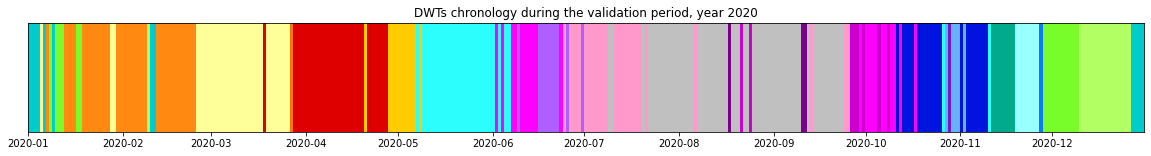

In [16]:
fig_bmus = plot_bmus_chronology(xs_val,val_bmus,year_val)

<br />
<br />

## <font color='royalblue'>**6.2 Predictand computation and plotting**</font> <a name="plv"></a>
<br />

**From the DWT the daily expected mean number of TCs in 8x8º cells map in the target area maps are known and thus the monthly aggregated maps can be computed.**

<br>

**Daily expected number of TCs**

In [8]:
xds_timeline_val,xs_M_val = ds_monthly_probabilities_val(df_2021,val_bmus,xs_val,xs_dwt_counts,xs_dwt_counts_964)

<br>

**Monthly expected number of TCs**

In [9]:
xs_M_val

<xarray.Dataset>
Dimensions:         (lat: 5, lon: 8, time: 12)
Coordinates:
  * time            (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
  * lat             (lat) int64 -30 -22 -14 -6 2
  * lon             (lon) int64 160 168 176 184 192 200 208 216
Data variables:
    mask_tcs        (time, lat, lon) float64 7.0 7.0 7.0 7.0 ... nan nan nan nan
    counts_tcs      (time, lat, lon) float64 92.0 112.0 62.0 ... nan nan nan
    counts_tcs_964  (time, lat, lon) float64 15.0 41.0 3.0 64.0 ... nan nan nan
    probs_tcs       (time, lat, lon) float64 0.3473 0.4187 0.2266 ... nan nan
    probs_tcs_964   (time, lat, lon) float64 0.06037 0.1586 0.01639 ... nan nan

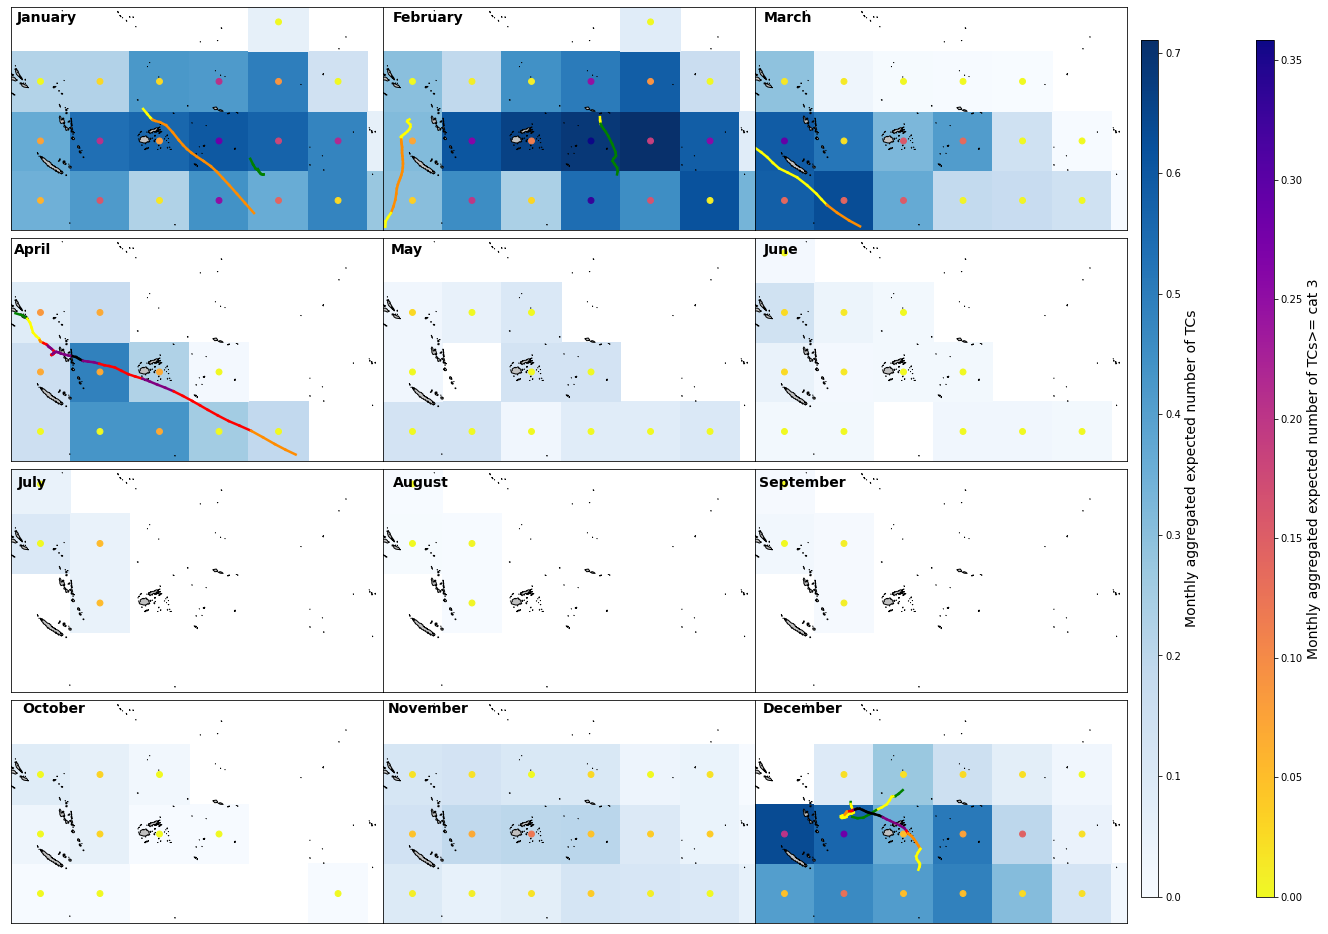

In [12]:
fig_val_year_8 = plot_validation_year(df_2021,xs_M_val,xds_timeline_val,35)

<br>

**Full season:**

<br>

![TITLE](val.png)

<br> 

<div style="padding: 15px; border: 1px solid transparent; border-color: transparent; margin-bottom: 20px; border-radius: 4px; color: rgb(0,0,0); background-color: #fcf8e3; border-color: #faebcc; ">
    
**The model generally performs well when estimating the expected TC activity and intensity.**
<br>
    
**However rather than reproducing exactly the historical TCs tracks it shows higher number of expected TCs in the TC path and also in the surroundings -> overstimation (January).**
<br>
    
**When a TC is very intense or very close in dates to the previous or following month it leaves its footprint (Harold 1/04 in March).**
   
    
</div>